In [2]:
import matplotlib.pyplot as plt

from rushlight.utils.proj_imag_classified import SyntheticFilterImage as sfi
from rushlight.config import config

import aiastereo as aist
from CoronalLoopBuilder.builder import CoronalLoopBuilder # type: ignore
import sunpy


In [3]:
update_with_dummy = False

CROPPED_DIR = './observations_cropped/'
AIA_IMG = '171_AIA_2012-07-19T10:14:11.34.fits'
STEREO_IMG = '171_STEREO_2012-07-19T10:14:00.016.fits'

LOOP_DIR = './loop_params/'
LOOP_FNAME = 'aia_stereo_loop_171.pkl'
LOOP_PTH = LOOP_DIR + LOOP_FNAME

In [4]:
aia_map = sunpy.map.Map(CROPPED_DIR + AIA_IMG)
stereo_map = sunpy.map.Map(CROPPED_DIR + STEREO_IMG)

In [5]:
# Remaining variables for sfi generation 
datacube = config.SIMULATIONS['DATASET']    # Path to 3D gaseous dataset to be projected
zoom = 0.4                                  # Zoom amount for projected box (0-1)


Loop length: 114.23973285781067 Mm


2025-03-28 10:29:08 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-03-28 10:29:08 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


Loop length: 114.23973285781067 Mm
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


NameError: name 'loop_params' is not defined

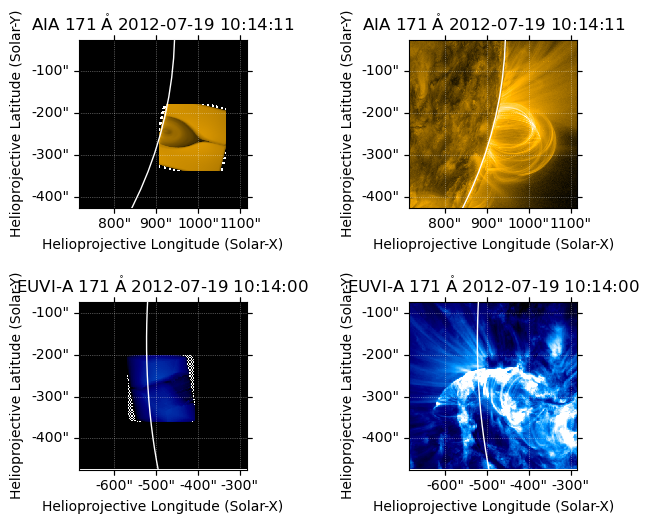

In [ ]:
# Create figure with subplots
fig = plt.figure()
subfigs = fig.subfigures(2, 2, wspace=0.07)

# params = man_loop_params if manual_params else loop_params

# Generate aia-based SFI and plot synthetic, real maps
sfiObj1 = sfi(dataset=datacube, smap=aia_map, pkl=LOOP_PTH, zoom=zoom)   #TODO add in manual norm / north to call
ax1, synthmap1, norm1, north1, image_shift1 = sfiObj1.synthmap_plot(fig=subfigs[0,0], plot='synth')
ax2 = subfigs[0,1].add_subplot(projection=aia_map)
aia_map.plot(axes=ax2)
aia_map.draw_limb(axes=ax1)
aia_map.draw_limb(axes=ax2)

# Generate stereo-based SFI and plot synthetic, real maps
sfiObj2 = sfi(dataset=datacube, smap=stereo_map, pkl=LOOP_PTH, zoom=zoom)
ax3, synthmap2, norm2, north2, image_shift2 = sfiObj2.synthmap_plot(fig=subfigs[1,0], plot='synth')
ax4 = subfigs[1,1].add_subplot(projection=stereo_map)
stereo_map.plot(axes=ax4)
aia_map.draw_limb(axes=ax3)
aia_map.draw_limb(axes=ax4)
# aist.plot_aia_los(ax3, aia_map, loop_params=loop_params)
# aist.plot_aia_los(ax4, aia_map, loop_params=loop_params)

# Overplot CLB loops
coronal_loop1 = CoronalLoopBuilder(fig, [ax1, ax2, ax3, ax4], [synthmap1, aia_map, synthmap2, stereo_map], **loop_params)
